Project: Investigate a Dataset - (No-Show appointments of patients-May 2016)
Table of Contents
Introduction
Data Wrangling
Exploratory Data Analysis
Conclusions

Introduction
This dataset , in Brazil, collects information from 100k medical appointment and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

-‘Neighbor-hood’ indicates the location of the hospital.

-‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

-‘ScheduledDay’ tells us on what day the patient set up their appointment.

Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

Dataset Description
We have a csv file that contains our data, we need to describe.

Question(s) for Analysis
What are the important factors we need to know to predict if the patients are going to show up for their appointment?


In [19]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import seaborn as snb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
# Upgrade pandas to use dataframe.explode() function. 


In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis

General Properties:
Assess data:¶



In [20]:
# Load your data and print out a few lines. Perform operations to inspect data
#types and look for instances of missing or possibly errant data.

import pandas as pd
df=pd.read_csv("KaggleV2-May-2016.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [21]:
# to  explore shape of data -# to know the shape of data(number of rows and columns)
df.shape

(110527, 14)

In [22]:
# to show any missing values to handle it furthure    
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  Noshow          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [23]:
# to know if there is duplication or not
df.duplicated().sum()

0

In [24]:
#to check for duplication in patien ID
df["PatientId"].duplicated().sum()

48228

In [25]:
#to check for number of unique patients 
df["PatientId"].nunique()

62299

In [26]:
#check if there are duplication in petient id but differ in noshow status
df.duplicated(['Noshow','PatientId']).sum()


38710

In [27]:
#to get informations about our data (describtion)
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [28]:
#to detect location of Age with value -1 :
mask=df.query('Age==-1')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Cleaning the data
After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section


In [29]:

# to remove Age with value -1:
df.drop(index=99832,inplace=True)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [30]:
#corrections for names of columns:
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'SMS_received':'SMSreceived'},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMSreceived,Noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [31]:
#remove the duplication data of patientID and Noshow status

df.drop_duplicates(['PatientId','Noshow'],inplace=True)
df.shape

(71816, 14)

In [32]:
#remove unimportant data
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMSreceived,Noshow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Conclusion of Data wrangling
After collecting the data we explore the first rows of data and check the dimensions of data and check if there are any duplication and unnecessary data need to be removed .then in cleaning section , we modify the name of columns and drop any useless informations.

Exploratory Data Analysis
Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Scholarship'}>,
        <AxesSubplot: title={'center': 'Hypertension'}>],
       [<AxesSubplot: title={'center': 'Diabetes'}>,
        <AxesSubplot: title={'center': 'Alcoholism'}>,
        <AxesSubplot: title={'center': 'Handcap'}>],
       [<AxesSubplot: title={'center': 'SMSreceived'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

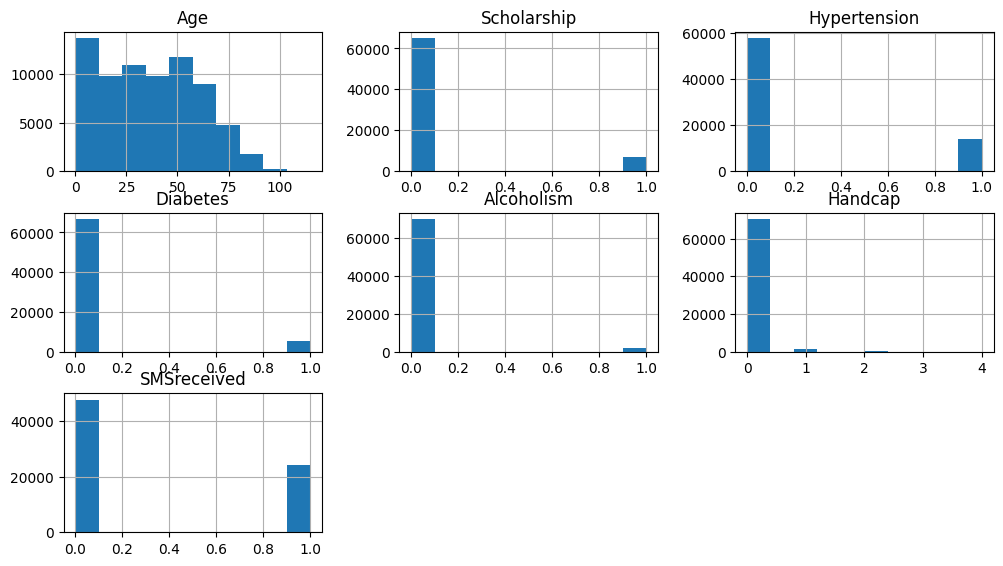

In [33]:
#Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

df.hist(figsize=(12,6.5))

In [34]:
show=df.query("Noshow=='No'")
noshow=df.query("Noshow=='Yes'")
print(show.count())
print("-"*50)
print(noshow.count())

Gender           54153
Age              54153
Neighbourhood    54153
Scholarship      54153
Hypertension     54153
Diabetes         54153
Alcoholism       54153
Handcap          54153
SMSreceived      54153
Noshow           54153
dtype: int64
--------------------------------------------------
Gender           17663
Age              17663
Neighbourhood    17663
Scholarship      17663
Hypertension     17663
Diabetes         17663
Alcoholism       17663
Handcap          17663
SMSreceived      17663
Noshow           17663
dtype: int64


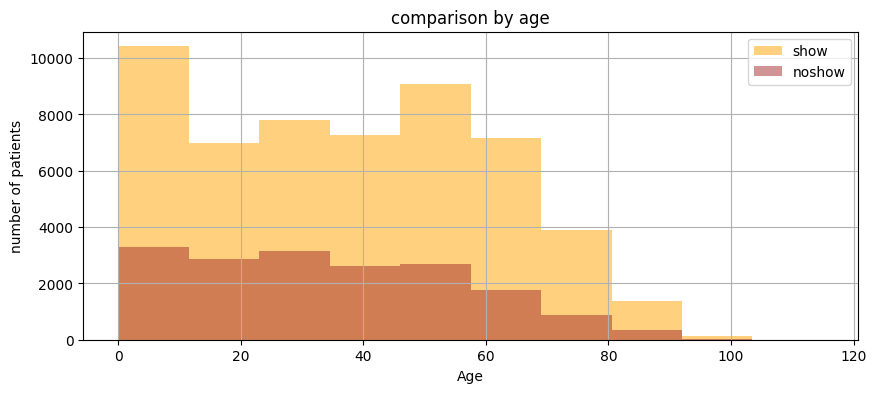

In [99]:
### Investigate the factors that effect the attendance rate

#effect of age on attendance:

def attendance(df,col_name,attended,absent): #setting figure size
     plt.figure(figsize=[10,4])
     # values=df.query('Noshow==True')['Age']
     # print(df.loc[:, ["Age", "Noshow"]]   
     # https://sparkbyexamples.com/pandas/pandas-extract-column-value-based-on-another-column/
     df.query("Noshow=='No'")[col_name].hist(alpha=.5,bins=10,color="orange",label="show")    
     print("=================================")
     df.query('Noshow==\'Yes\'')[col_name].hist(alpha=.5,bins=10,color="brown",label="noshow")    
     # df[col_name][show].hist(alpha=.5,bins=10,color="orange",label="show")    
     # df[col_name][noshow].hist(alpha=.5,bins=10,color="brown",label="noshow")
     plt.legend();
     plt.title("comparison by age")
     plt.xlabel("Age")
     plt.ylabel("number of patients");

     
attendance(df,"Age",show,noshow)